The first 5 records of the Dataset are: 
        0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0   

The last 5 records of the Dataset are: 
         0     1     2     3      4     5     6     7     8     9     10    11  \
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.7  0.64  1.74   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.3  0.70  1.56   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.2  0.59  1.56   
176  13.17  2.59  2.37  20.0  120.0  1.65  

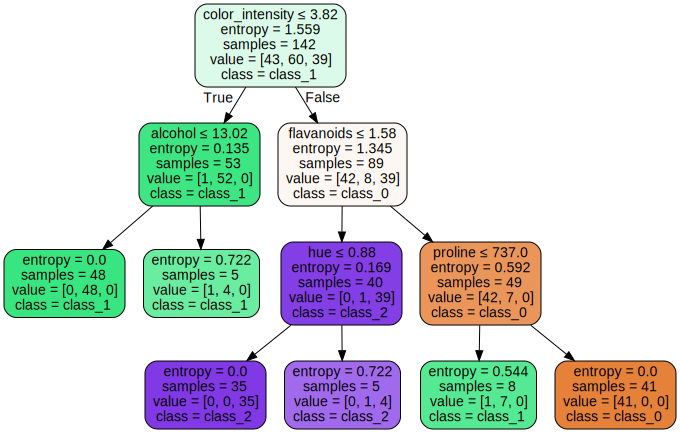

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz 

#load datasets
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
y = wine.target
z = wine.data

print ("The first 5 records of the Dataset are: \n ", df.head(5),"\n")
print ("The last 5 records of the Dataset are: \n", df.tail(5),"\n")

print ("The class names of the Wine Dataset are: \n",wine.feature_names,"\n")

print("The class names of the Wine Dataset are: \n",wine.target_names,"\n")

#split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print ("Dimensions of the Training Data Set are: \n",X_train.shape, y_train.shape,"\n")
print ("Dimensions of the Test Data Set are: \n",X_test.shape, y_test.shape,"\n")


#Using Entropy to measure the quality of the split.
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

#Prediction using Entropy
y_pred = clf_entropy.predict(X_test)
y_pred

#Confusion Matrix
confusion_matrix(y_test, y_pred)

#Classification Report
print(classification_report(y_test, y_pred, target_names=wine.target_names))

#Decision Tree Visualization


dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
#References:
#https://anaconda.org/anaconda/graphviz
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#